### 如何根据精准率和召回率选择算法

有些算法精准率高，召回率低，有些算法召回率高，精准率低。如何根据这两个指标选择算法，要视情况而定

有的时候注重精准率，比如股票预测  
有的时候注重召回率，比如病人诊断

有的时候需要同时关注精准率和召回率，可以使用F1 Score
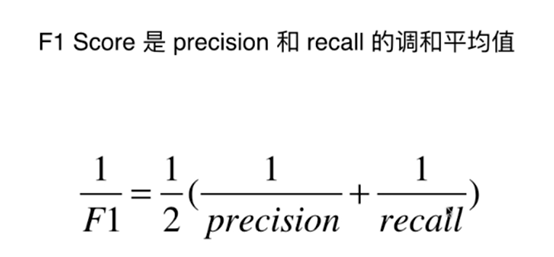
调和平均值的特点是，当precision或者recall有一个特别高，另一个特别低，那么得到的F1 score也会特别低。  
只有当二者都很高时，F1 score才会特别高
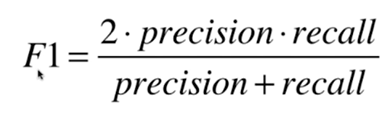

In [1]:
import numpy as np

In [3]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [4]:
precision = 0.5  # 当precision和recall两者平均时，真实反应
recall = 0.5
f1_score(precision, recall)

0.5

In [5]:
precision = 0.1  # 当两者极度不平衡时，f1_score很小
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [6]:
precision = 0.0  # 当两者极度不平衡时，f1_score很小
recall = 1.0
f1_score(precision, recall)
# f1_score的优势，可以同时的表征precision和recall两种指标

0.0

In [7]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

E:\Application\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9755555555555555

In [10]:
y_predict = log_reg.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [12]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [13]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [14]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict) 
# 对于有偏的数据，这个指标可以更好地衡量该算法的性能

0.8674698795180723